In [7]:
function f(x,y)
    return sin(pi*x)*sin(pi*y)/pi
end

f (generic function with 1 method)

In [27]:
# Jacobi method for solving 2D laplace equation by finite diffences
# on [0,1] x [0,1] square with v(B)=0 {B : boundary}
function laplace_solver(f, n=200, niter=50)
    v = zeros(n+2,n+2)
    h = 1/n
    for _ in 1:niter
        for i in 2:n+1, j in 2:n+1
            v[i,j] = ( v[i-1,j] + v[i,j-1] + v[i+1,j] + v[i,j+1] - h^2 * f(i*h, j*h) ) / 4
        end
    end
    return v
end

laplace_solver (generic function with 3 methods)

In [37]:
@time begin
sol = laplace_solver(f)
end

  0.053651 seconds (2 allocations: 318.891 KiB)


202×202 Array{Float64,2}:
 0.0   0.0          0.0          0.0         …   0.0          0.0         0.0
 0.0  -6.07801e-8  -1.19817e-7  -1.77601e-7     -7.0934e-8   -3.31336e-8  0.0
 0.0  -1.19817e-7  -2.36738e-7  -3.51355e-7     -1.42544e-7  -6.71979e-8  0.0
 0.0  -1.77601e-7  -3.51355e-7  -5.21897e-7     -2.14237e-7  -1.01508e-7  0.0
 0.0  -2.34411e-7  -4.64102e-7  -6.89753e-7     -2.85701e-7  -1.35786e-7  0.0
 0.0  -2.90431e-7  -5.75303e-7  -8.55354e-7  …  -3.56786e-7  -1.69912e-7  0.0
 0.0  -3.45799e-7  -6.85216e-7  -1.01906e-6     -4.27428e-7  -2.03836e-7  0.0
 0.0  -4.00621e-7  -7.94043e-7  -1.18115e-6     -4.97613e-7  -2.37544e-7  0.0
 0.0  -4.54979e-7  -9.01948e-7  -1.34186e-6     -5.6735e-7   -2.71036e-7  0.0
 0.0  -5.0894e-7   -1.00906e-6  -1.50139e-6     -6.36657e-7  -3.04319e-7  0.0
 0.0  -5.62554e-7  -1.11547e-6  -1.65988e-6  …  -7.0556e-7   -3.37404e-7  0.0
 0.0  -6.15858e-7  -1.22127e-6  -1.81745e-6     -7.7408e-7   -3.70302e-7  0.0
 0.0  -6.68881e-7  -1.32651e-6  -1.974

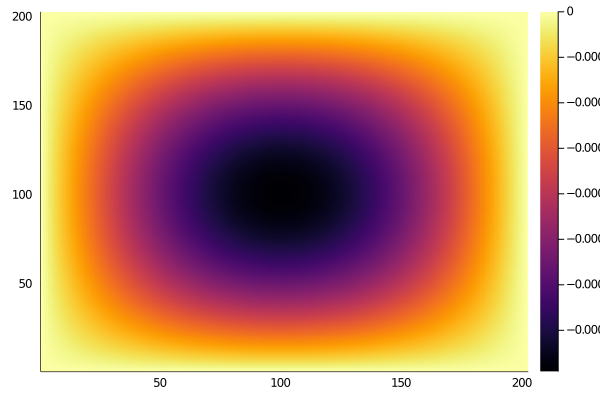

In [36]:
using Plots
heatmap(sol)